In [1]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
%load_ext autoreload
%autoreload 2
import textwrap
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

# from omnilearn import util

from ew_etfs import *
from ew_etfs import INDEX, ETF, CACHE


In [2]:
sum(x['ratio'] for x in aex)

0.9846999999999999

In [3]:
print(tabulate(sorted([(tk, tks[0]['country'], len(tks)) for tk, tks in ETF.items()], key=lambda i: i[-1], reverse=True), 
               headers=['Ticker', 'Country', 'Assets']))
print(tabulate(sorted([(tk, tks[0]['country'], len(tks)) for tk, tks in INDEX.items()], key=lambda i: i[-1], reverse=True), 
               headers=['Ticker', 'Country', 'Assets']))

Ticker    Country        Assets
--------  -----------  --------
EWQ       France             70
EWG       Germany            61
EWN       Netherlands        58
EWK       Belgium            46
GREK      Greece             26
EWO       Austria            26
EWI       Italy              25
PGAL      Portugal           22
EWP       Spain              19
Ticker    Country        Assets
--------  -----------  --------
DAX       Germany            40
AEX       Netherlands        23
CAC       France             21


In [4]:
name = 'EWG'

In [5]:
def load_etf(name):
    etf = ETF.get(name)
    if etf is None:
        etf = INDEX[name]
    country = etf[0]['country']
    if name not in CACHE:
        infos = [tk.info for tk in tqdm([yf.Ticker(t['ticker']) for t in etf])]
    else:
        infos = CACHE[name]
    for base, info in zip(etf, infos):
        info.update(base)
    for item in infos:
        item['prefix'] = item['ticker'].split('.')[0]
    return infos

In [6]:
etf = ETF[name]
country = etf[0]['country']
len(etf)

61

In [7]:
if name not in CACHE:
    infos = [tk.info for tk in tqdm([yf.Ticker(t['ticker']) for t in etf])]
else:
    infos = CACHE[name]
for base, info in zip(etf, infos):
    info.update(base)
for item in infos:
    item['prefix'] = item['ticker'].split('.')[0]
len(infos)

61

In [8]:
# print(infos)

In [9]:
base_sectors = [
    'Technology', 
    'Healthcare',
    'Industrials', 
    'Financial Services', 
    'Communication Services', 
    'Consumer Cyclical', 
    'Consumer Defensive', 
    'Basic Materials', 
    'Utilities', 
    'Energy', 
    'Real Estate',
    None,
]
rcolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
seccolors = {b:c for b,c in zip(base_sectors, rcolors)}

sector_aliases = {
    'Financial': 'Financial Services',
    'Consumer Discretionary': 'Consumer Cyclical',
    '': None,
    'Services': 'Consumer Cyclical',
    'Industrial Goods': 'Industrials',
    'Consumer Goods': 'Consumer Defensive',
}
replace(infos, sector=sector_aliases);

In [17]:
names = list(ETF.keys())
etfs = [{'name': n, 'data':load_etf(n)} for n in tqdm(names)]
for etf in etfs:
    etf['country'] = etf['data'][0]['country']
# names = list(INDEX.keys())
# inds = [{'name': n, 'data':load_etf(n)} for n in tqdm(names)]
# for ind in inds:
#     ind['country'] = ind['data'][0]['country']

  0%|          | 0/9 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


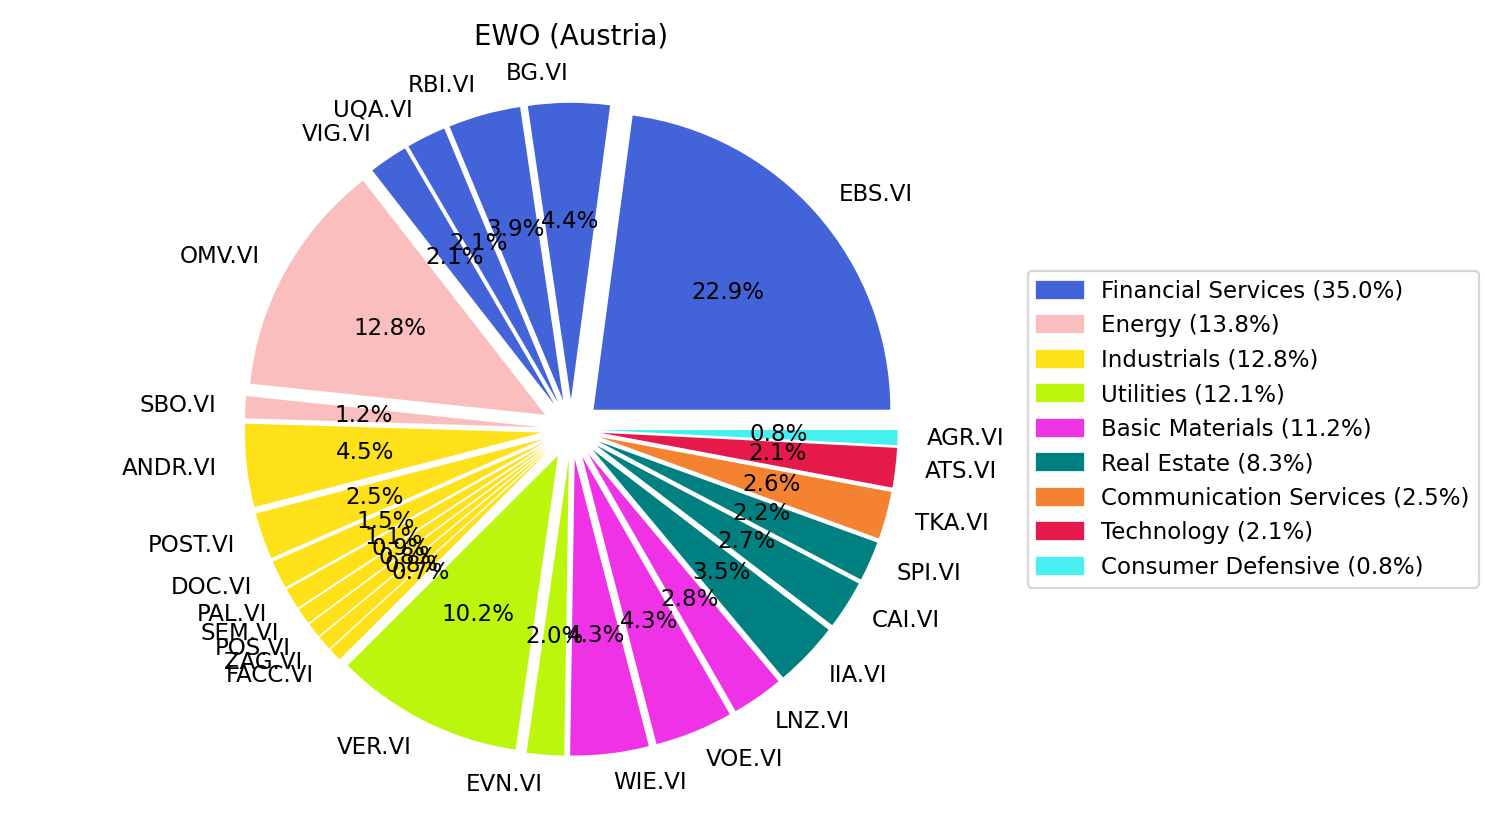

<IPython.core.display.Javascript object>


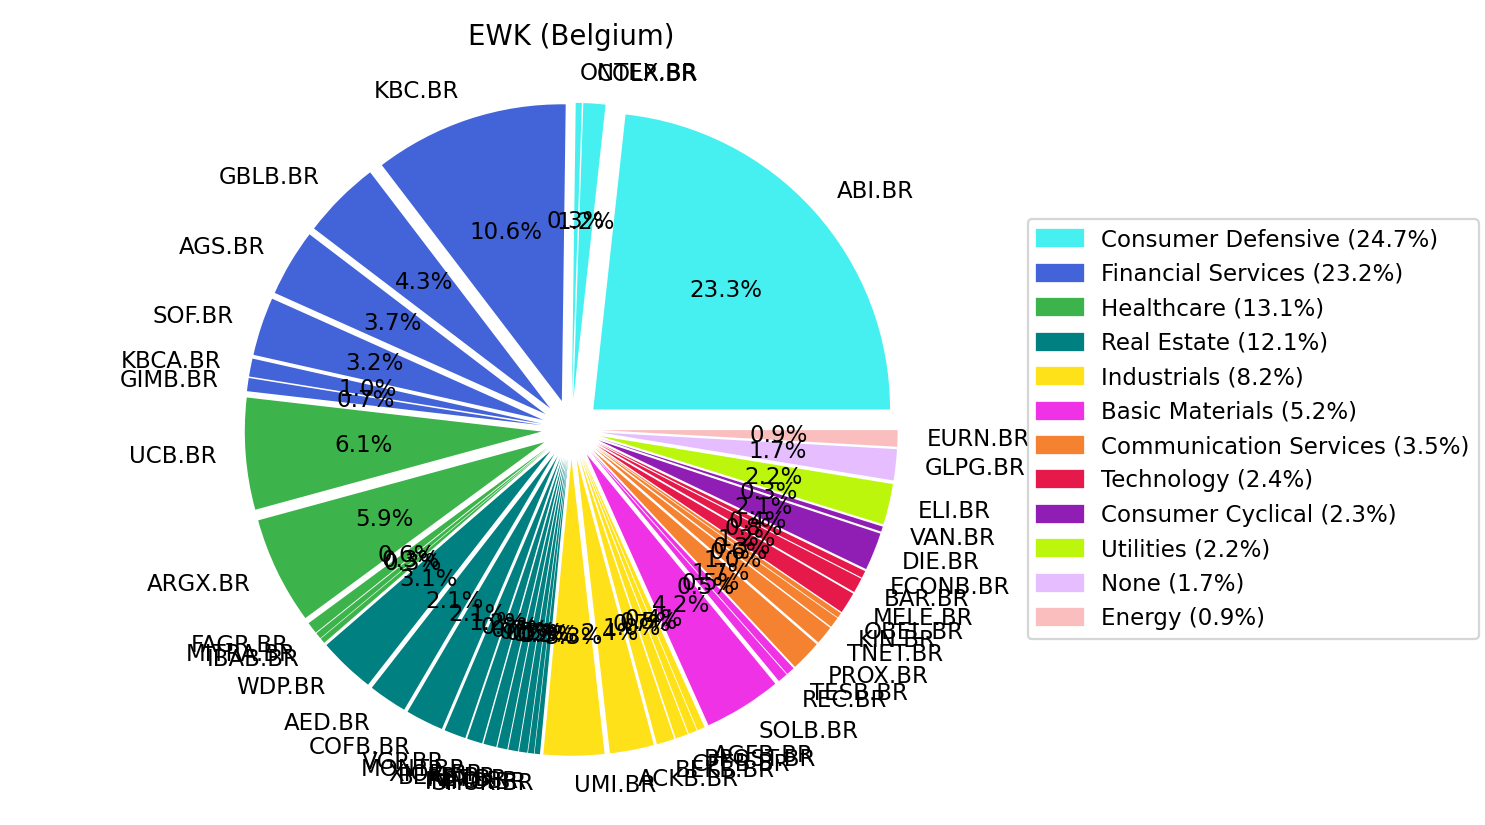

<IPython.core.display.Javascript object>


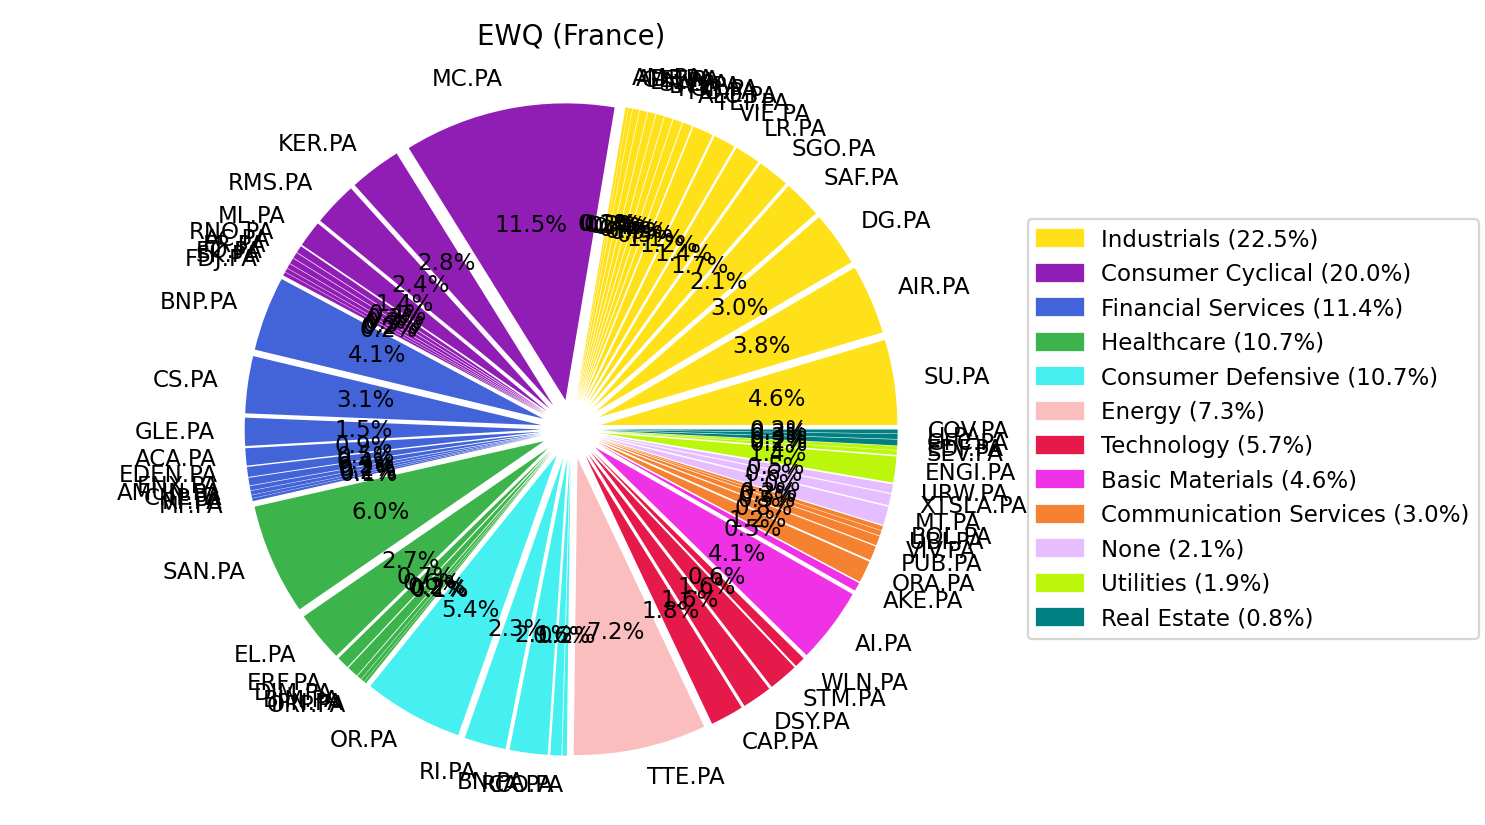

<IPython.core.display.Javascript object>


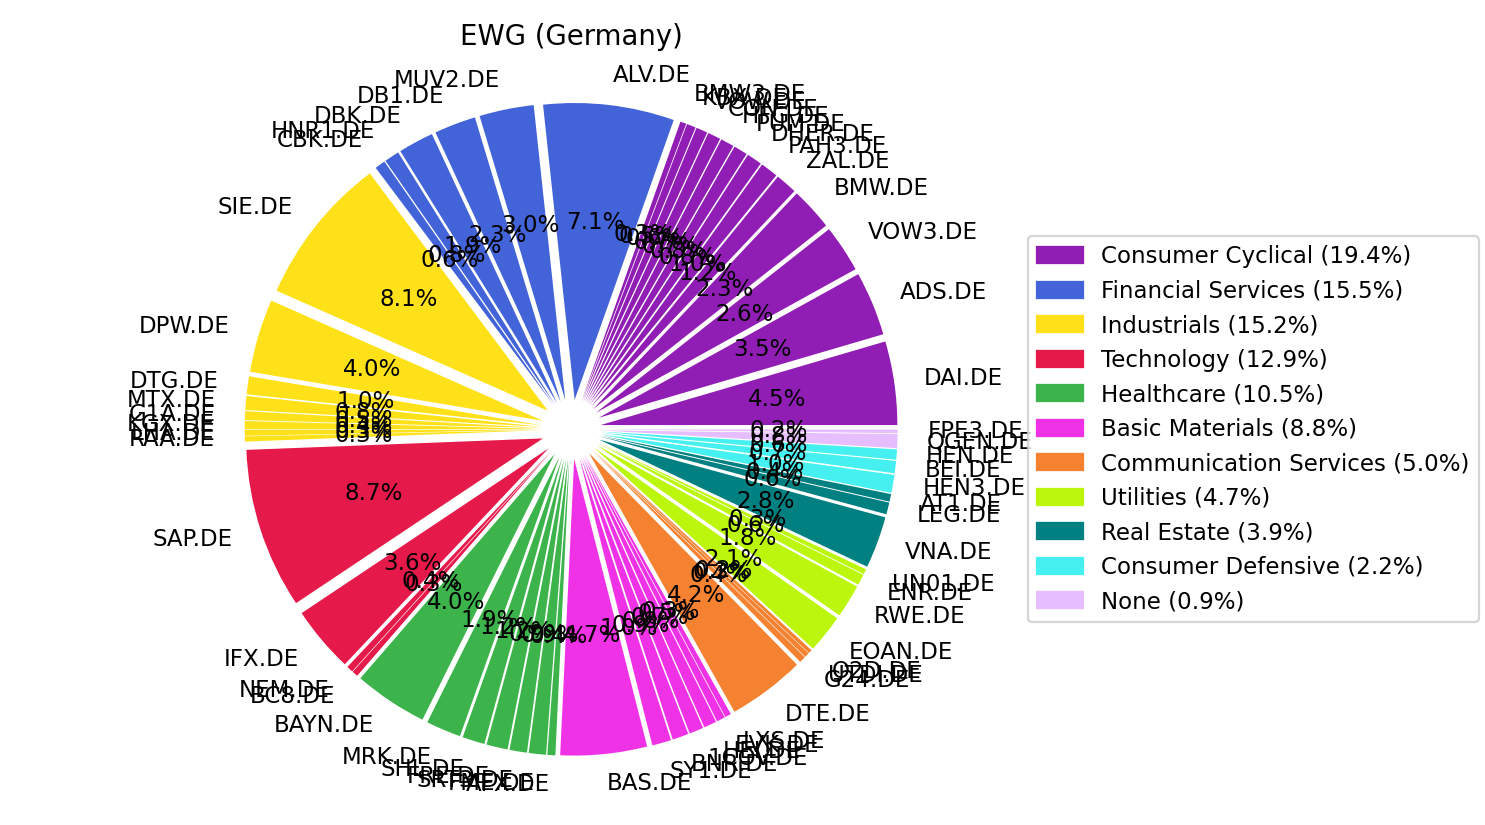

<IPython.core.display.Javascript object>


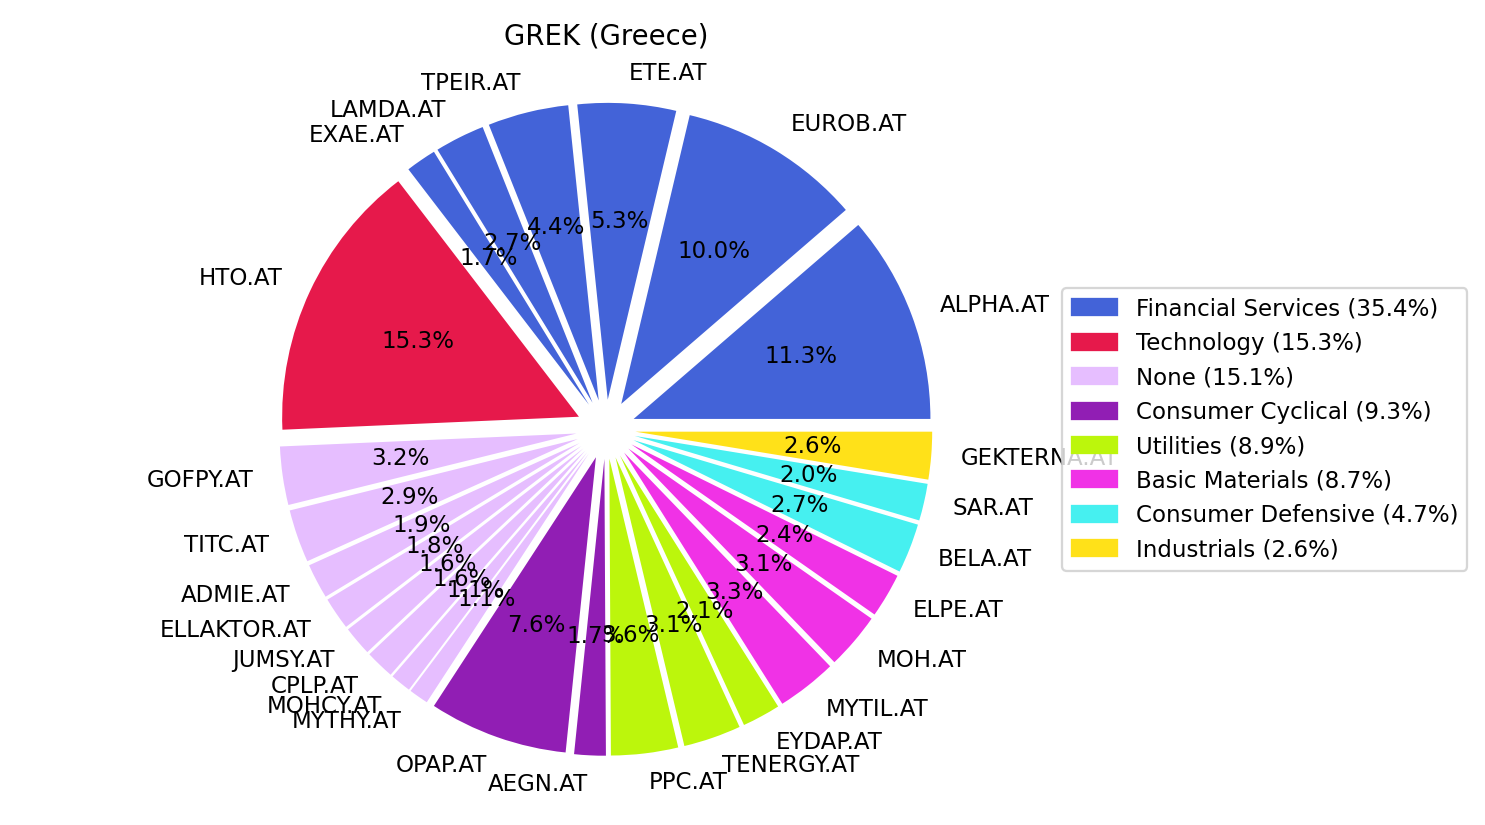

<IPython.core.display.Javascript object>


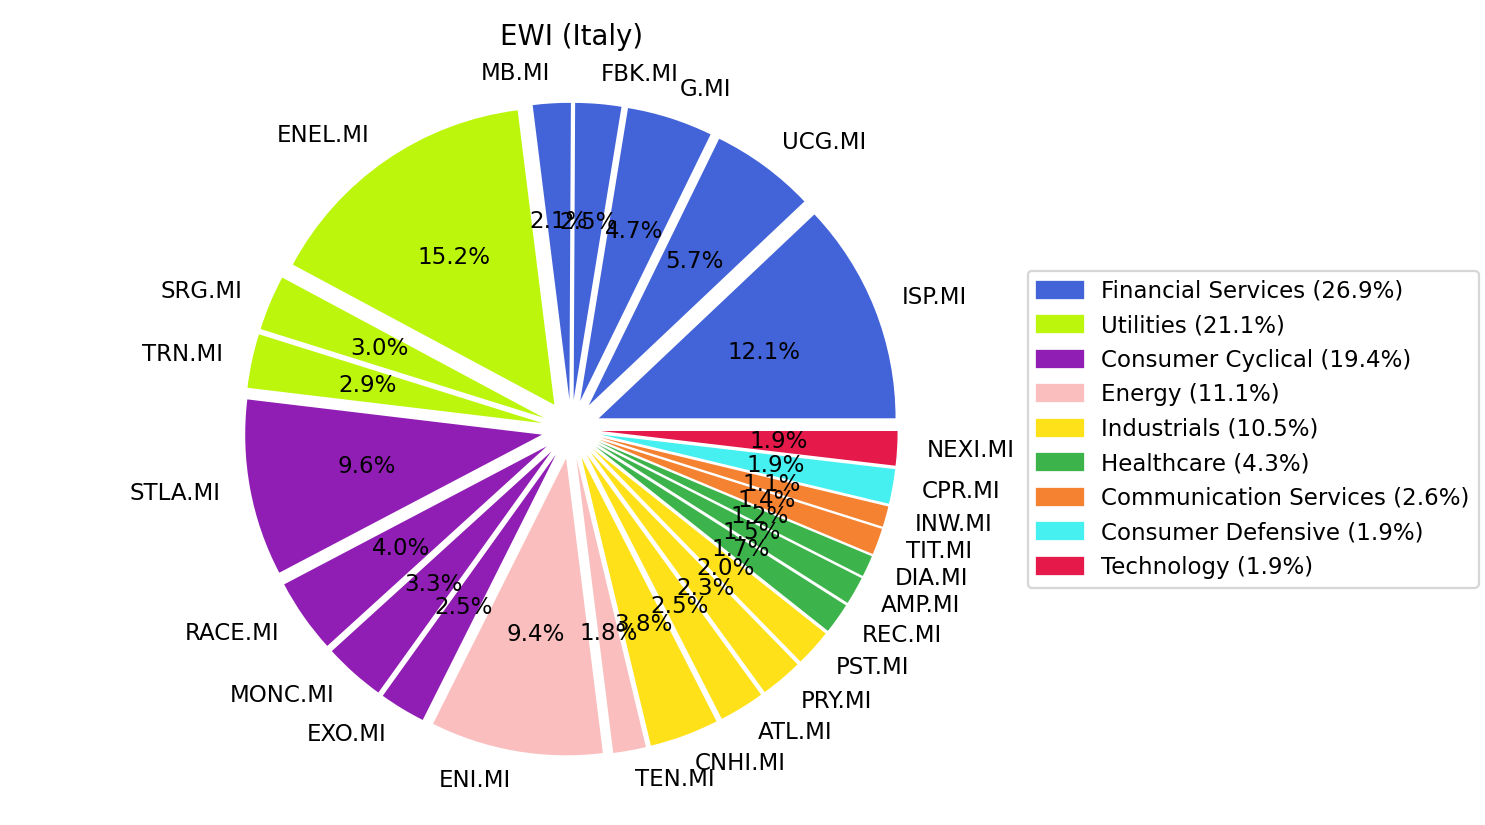

<IPython.core.display.Javascript object>


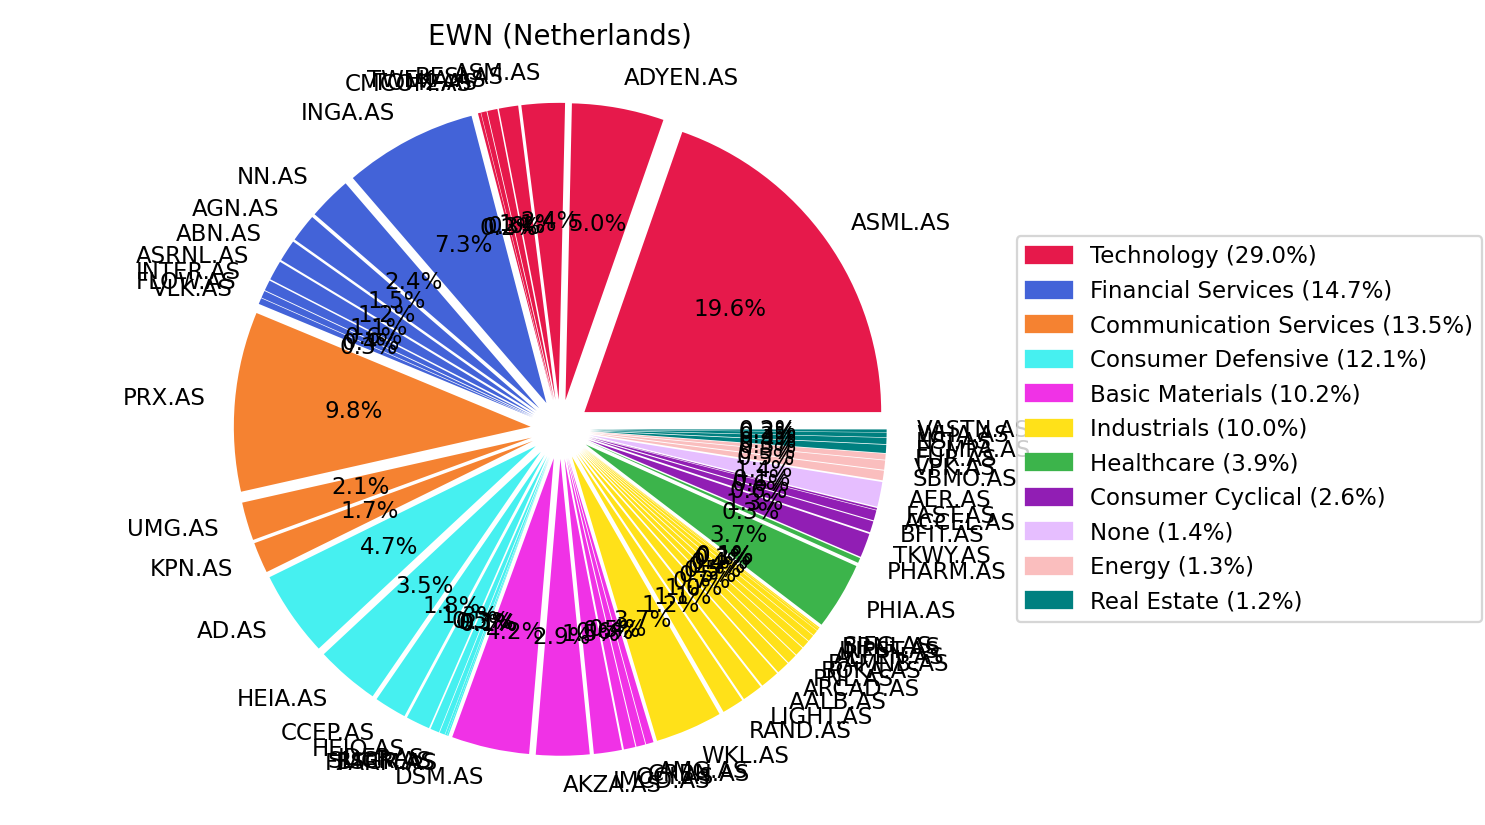

<IPython.core.display.Javascript object>


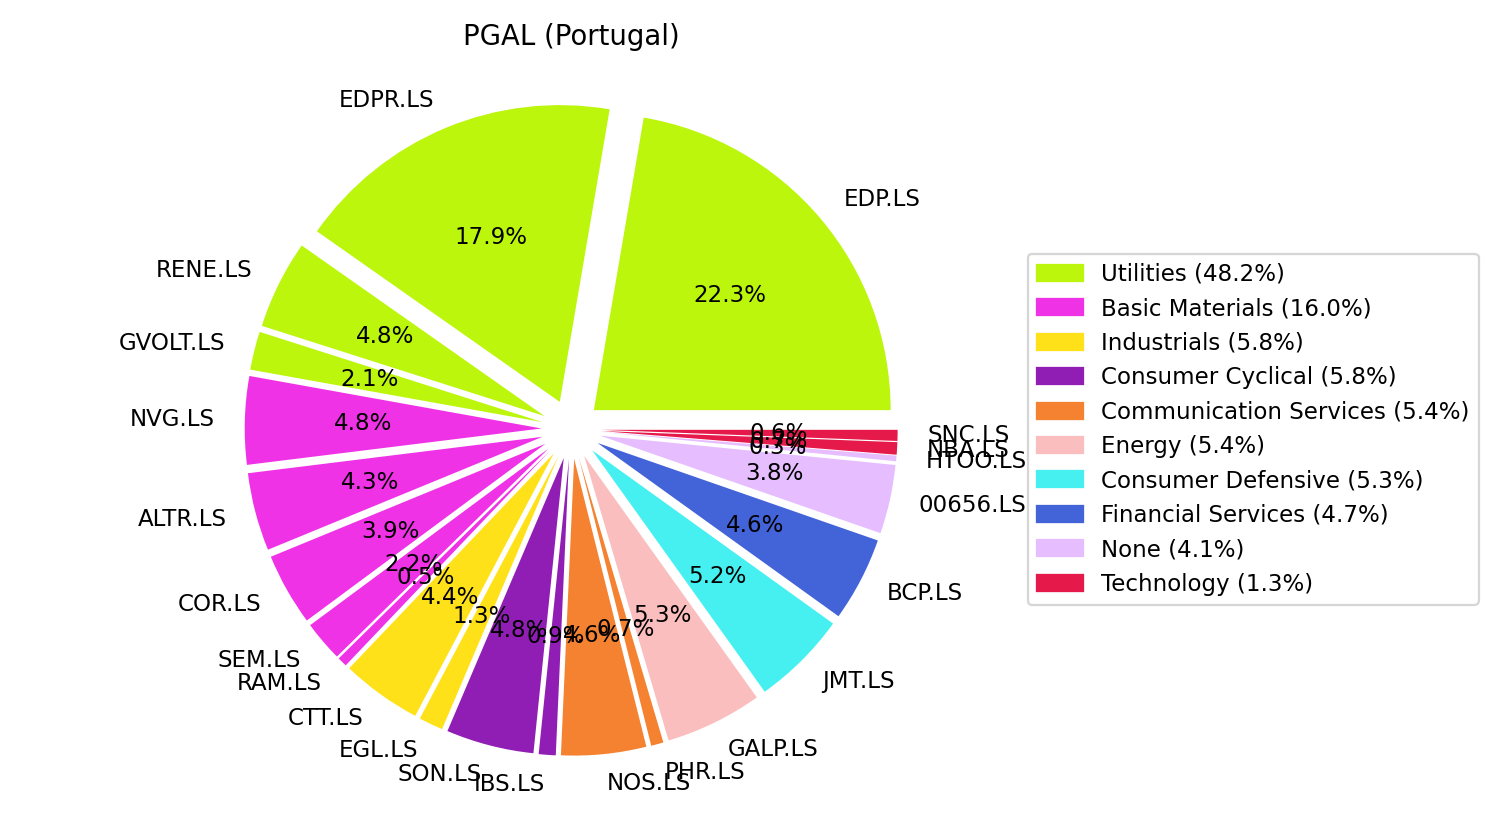

<IPython.core.display.Javascript object>


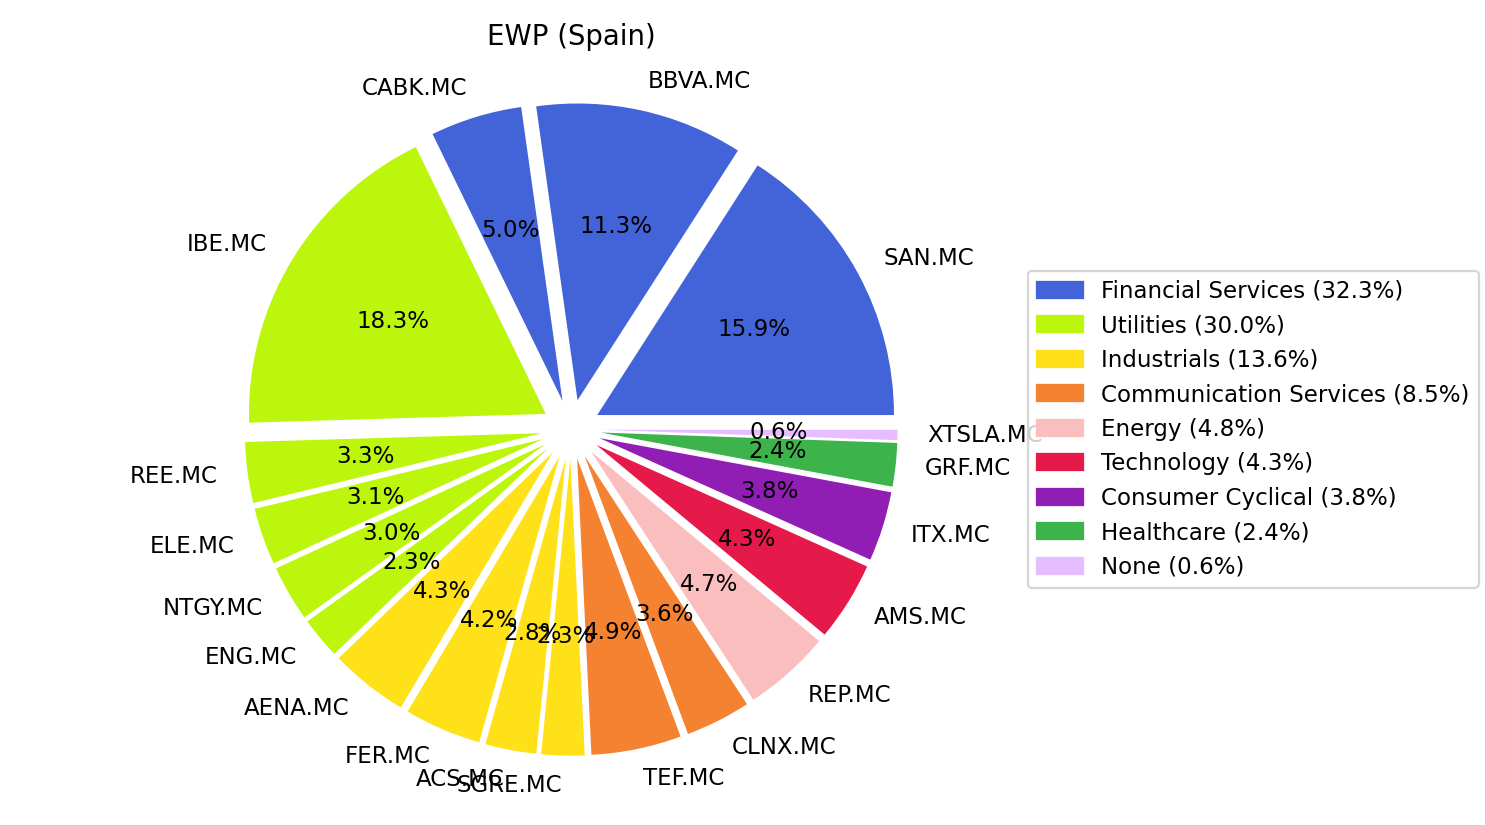

In [11]:
for etf in sorted(etfs, key=lambda e: e['country']):
    name, country, infos = etf['name'], etf['country'], etf['data']
    replace(infos, sector=sector_aliases);
    plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
    plt.title(f'{name} ({country})');
    plt.tight_layout();

In [12]:
# # sectors = group_cats(infos, 'sector', )
# # tot = sum(v for _, v in sectors)
# # sectors = [[k,v/tot] for k,v in sectors]
# # plot_pie(sectors, colors=seccolors);
# plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
# plt.title(f'{name} ({country})');
# plt.tight_layout();

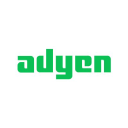

ADYEN.AS - ADYEN

Sector: Technology
Industry: Software—Infrastructure

Location: Amsterdam, Netherlands

Allocation: 5.0%
Yield: 0.0%

Adyen N.V.

Adyen N.V. operates a payments platform in Europe, North America, the Asia Pacific, Latin America, and internationally.
The company's platform integrates payments stack that include gateway, risk management, processing, acquiring, and
settlement services. It offers a back-end infrastructure for authorizing payments across merchants' sales channels, as
well as online, mobile, in-store, and APIs. The company's platform services a range of merchants across various
verticals, connecting them directly to Visa, Mastercard, and other payment methods and providing data insights. Adyen
N.V. was incorporated in 2006 and is headquartered in Amsterdam, the Netherlands.
Website: https://www.adyen.com

Quote: https://finance.yahoo.com/quote/ADYEN.AS


In [43]:
item = find(euro, prefix='ADYEN')
profile, img = profile_item(item, 120)
display(img)
print(profile)

In [13]:
# print(collate_group(infos, groupkey='industry'))

In [18]:
vgk_full = fidelity_portfolio(vgk_raw)
len(vgk_full)
prefs = {tk['prefix']: tk for tk in euro}
len(prefs)
vgk = []
for v in vgk_full:
    if v['ticker'] in prefs:
        vgk.append(prefs[v['ticker']].copy())
        vgk[-1]['ratio'] = v['ratio']
total = sum(k['ratio'] for k in vgk)
for v in vgk:
    v['full-ratio'] = v['ratio']
    v['ratio'] = v['ratio'] / total 
len(vgk), total

NameError: name 'euro' is not defined

In [19]:
# replace(vgk, sector=sector_aliases);
# plot_piece_pie(vgk, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
# plt.title(f'VGK Known Components');
# plt.tight_layout();

In [9]:
wts = {
    
    'EWG': 1.,
    'EWQ': 1.,
    
    'EWI': 1.,
    'EWN': 1.,
    
    'EWO': 1.,
    'EWK': 1.,
    'EWP': 1.,
    
#     'GREK': 1.,
    'PGAL': 1.,
}

In [10]:
euro = []
srcs = {}
mnorm = sum(wts.values())
for name, cache in CACHE.items():
    norm = 0.
    for base, info in zip(ETF[name], cache):
        info.update(base)
        norm += base.get('ratio', 0.)
    for item in cache:
        item['prefix'] = item['ticker'].split('.')[0]
        item['etf'] = name
        item['ratio'] = item['ratio'] / norm * wts.get(name,0) / mnorm
    if wts.get(name, 0) > 0:
        srcs[name] = cache
    if name in wts:
        euro.extend(cache)
len(euro)

327

In [12]:
sum(i['ratio'] for i in euro)

0.9999999999999994

In [11]:
# item = find(euro, prefix='ASML')
# profile, img = profile_item(item, 120)
# display(img)
# print(profile)

In [12]:
print(collate_group(euro, groupkey='sector'))

Sector                     Total  Components
----------------------  --------  --------------
Financial Services      20.5458   EBS.VI    2.9%
                                  SAN.MC    2.0%
                                  ISP.MI    1.5%
                                  BBVA.MC   1.4%
                                  KBC.BR    1.3%
                                  INGA.AS   0.9%
                                  ALV.DE    0.9%
                                  UCG.MI    0.7%
                                  CABK.MC   0.6%
                                  G.MI      0.6%
                                  BCP.LS    0.6%
                                  BG.VI     0.6%
                                  GBLB.BR   0.5%
                                  BNP.PA    0.5%
                                  RBI.VI    0.5%
                                  AGS.BR    0.5%
                                  SOF.BR    0.4%
                                  CS.PA     0.4%
                        

In [13]:
# plot_piece_pie(euro, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
# plt.title(f'Europe');
# plt.tight_layout();
print(collate_group(euro, groupkey='industry'))

Industry                                      Total  Components
--------------------------------------  -----------  --------------
Banks—Regional                          10.3843      EBS.VI   2.9%
                                                     ISP.MI   1.5%
                                                     KBC.BR   1.3%
                                                     UCG.MI   0.7%
                                                     CABK.MC  0.6%
                                                     BCP.LS   0.6%
                                                     BG.VI    0.6%
                                                     BNP.PA   0.5%
                                                     RBI.VI   0.5%
                                                     FBK.MI   0.3%
                                                     MB.MI    0.3%
                                                     DBK.DE   0.2%
                                                     GLE.PA   0.

In [16]:
for etf in sorted(etfs, key=lambda e: e['country']):
    name, country, infos = etf['name'], etf['country'], etf['data']
    if name in wts and wts[name] > 0:
        print('-'*60)
        print(f'{name} {country}')
        print(collate_group(infos, groupkey='sector'))
#         print(collate_group(euro, groupkey='industry'))
#         replace(infos, sector=sector_aliases);
#         plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
#         plt.title(f'{name} ({country})');
#         plt.tight_layout();

NameError: name 'etfs' is not defined

<IPython.core.display.Javascript object>


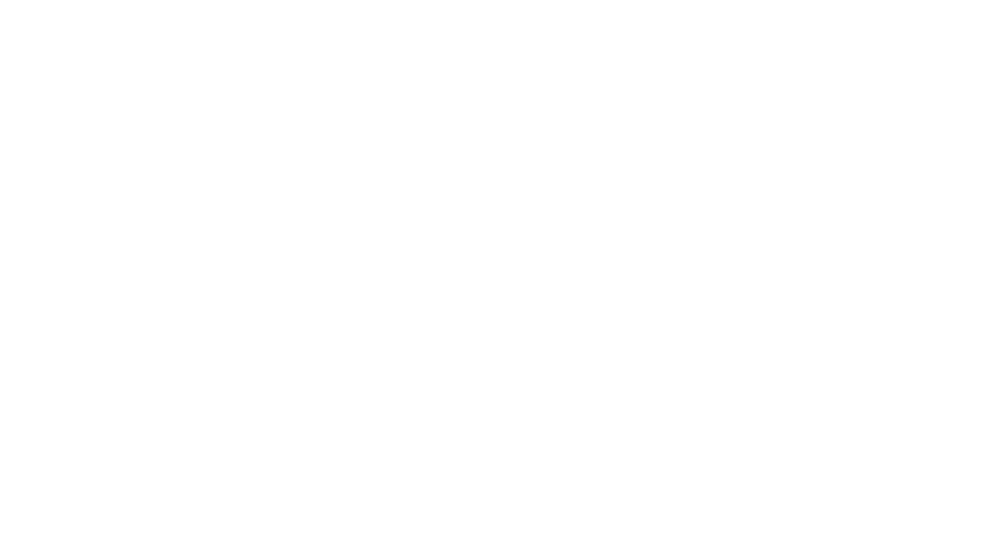

<IPython.core.display.Javascript object>


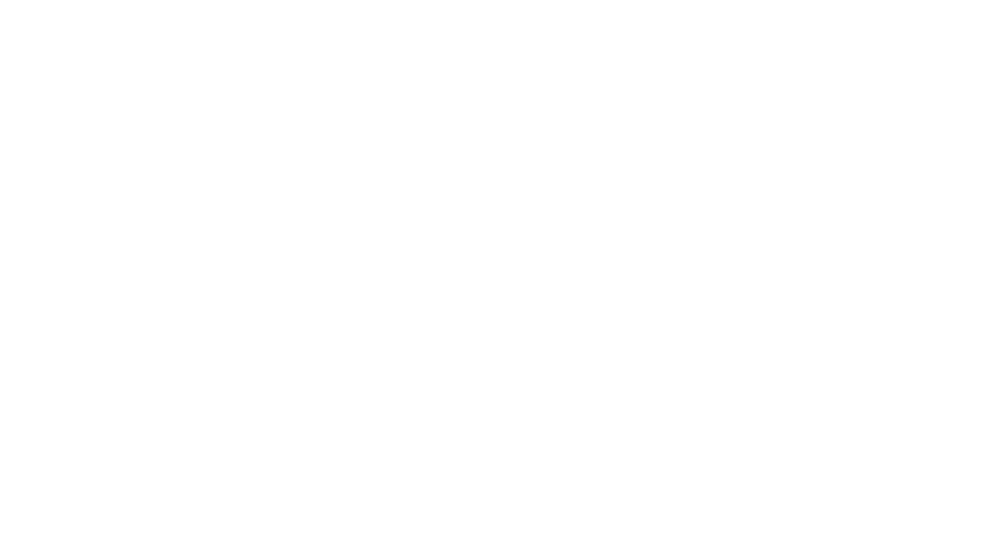

<IPython.core.display.Javascript object>


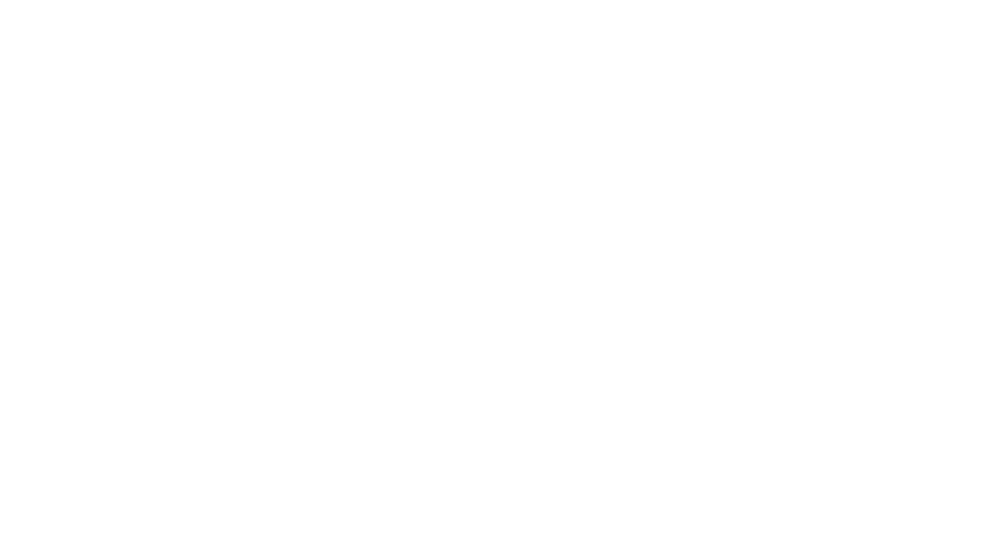

<IPython.core.display.Javascript object>


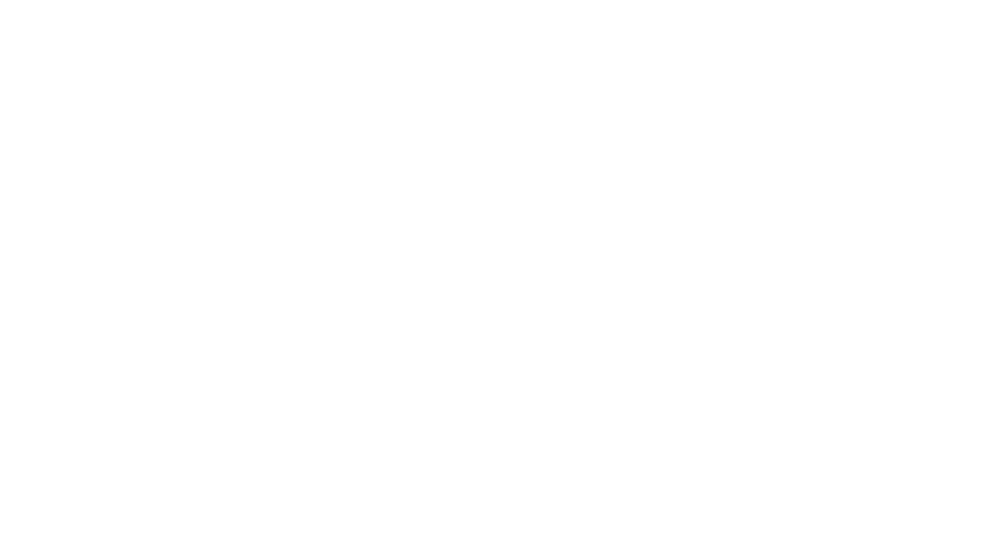

<IPython.core.display.Javascript object>


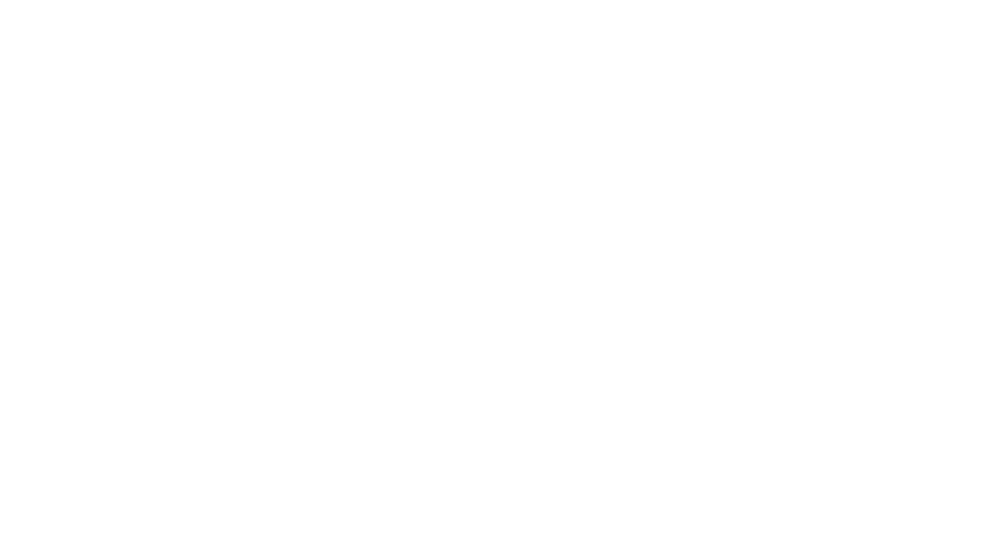

<IPython.core.display.Javascript object>


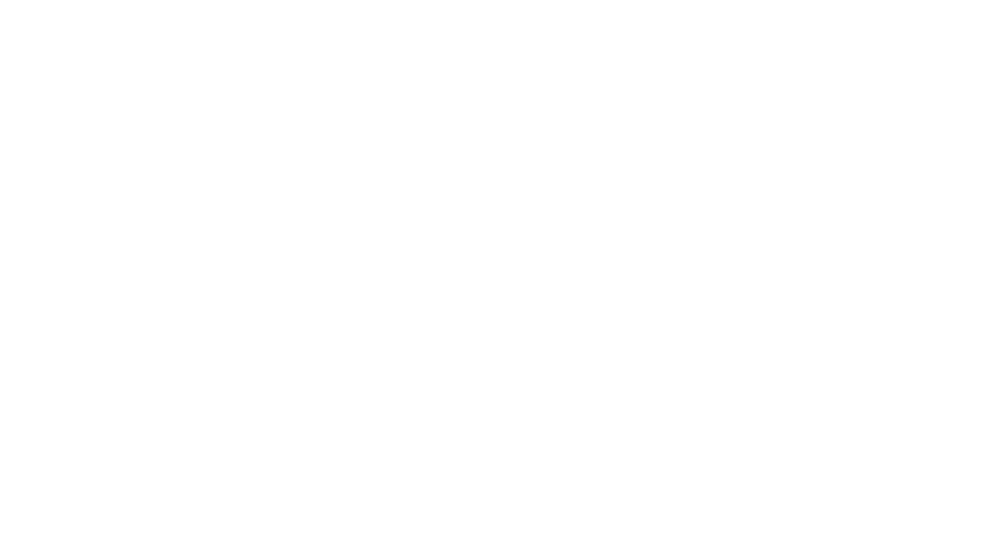

<IPython.core.display.Javascript object>


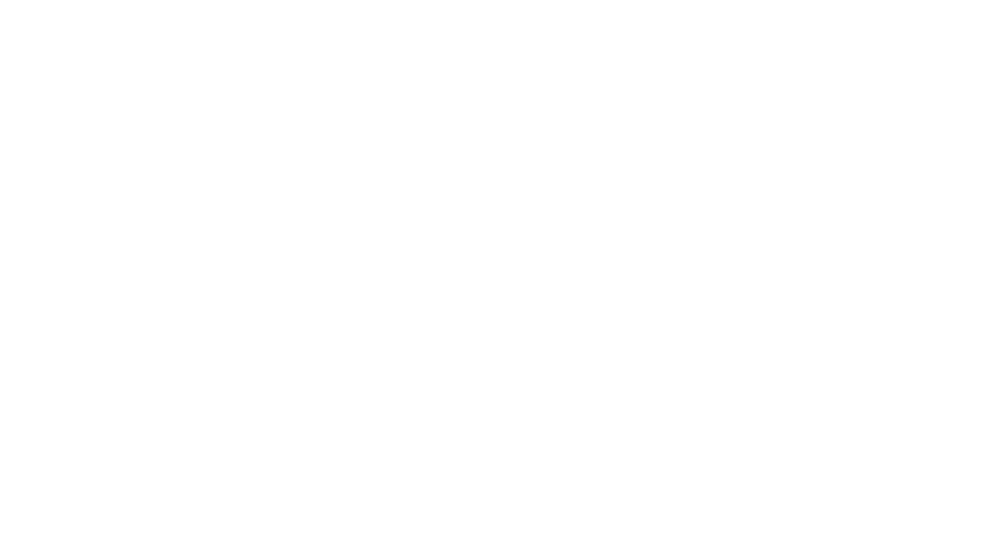

<IPython.core.display.Javascript object>


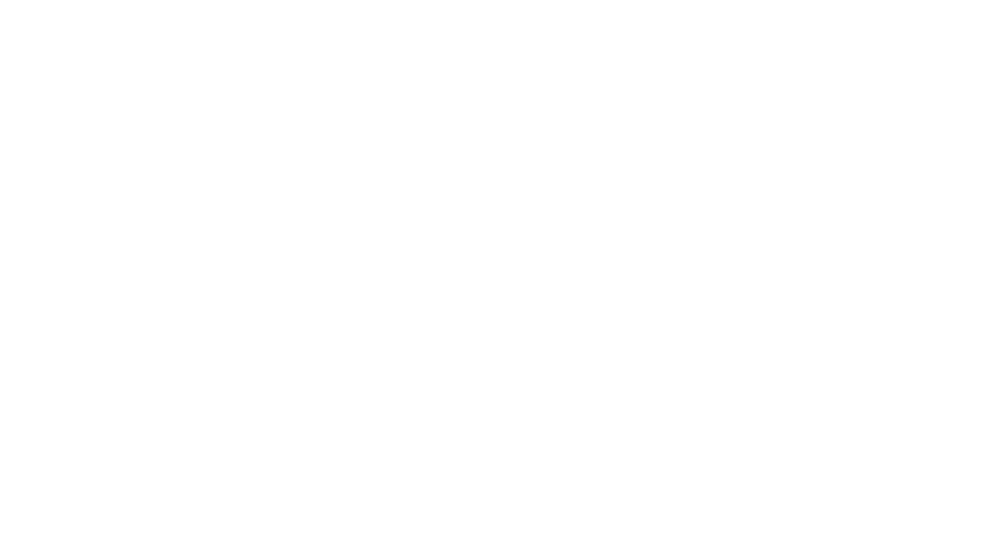

In [18]:
for etf in sorted(etfs, key=lambda e: e['country']):
    name, country, infos = etf['name'], etf['country'], etf['data']
    if name in wts and wts[name] > 0:
        replace(infos, sector=sector_aliases);
        plot_piece_pie(infos, colors=seccolors, groupkey='sector', figsize=(9,5),explode=0.1);
        plt.title(f'{name} ({country})');
        plt.tight_layout();

In [19]:
print(collate_group(srcs['EWI'], groupkey='sector'))

Sector                     Total  Components
----------------------  --------  -------------
Financial Services      3.37194   ISP.MI  1.5%
                                  UCG.MI  0.7%
                                  G.MI    0.6%
                                  FBK.MI  0.3%
                                  MB.MI   0.3%
Utilities               2.64115   -------  ----
                                  ENEL.MI  1.9%
                                  SRG.MI   0.4%
                                  TRN.MI   0.4%
Consumer Cyclical       2.43682   -------  ----
                                  STLA.MI  1.2%
                                  RACE.MI  0.5%
                                  MONC.MI  0.4%
                                  EXO.MI   0.3%
Energy                  1.39516   ------  ----
                                  ENI.MI  1.2%
                                  TEN.MI  0.2%
Industrials             1.3212    -------  ----
                                  CNHI.MI  0.5%
   

In [20]:
item = find(euro, prefix='STLA'.upper())
profile, img = profile_item(item, 120)
display(img)
print(profile)

STLA.MI - STELLANTIS

Sector: Consumer Cyclical
Industry: Auto Manufacturers

Location: Lijnden, Italy

Allocation: 1.2%
Yield: 0.5%

Stellantis N.V.

Stellantis N.V. engages in the design, engineering, manufacture, distribution, and sale of passenger vehicles, pickup
trucks, SUVs, and light commercial vehicles worldwide. It offers luxury, premium, and mainstream vehicles, as well as
financial services, and parts and services; and provides retail and dealer financing, leasing, and rental services. The
company offers its products under the Abarth, Alfa Romeo, Chrysler, Dodge, Fiat, Fiat Professional, Jeep, Maserati,
Opel, Ram, Free2Move, CitroÃ«n, DS Automobiles, Lancia, Mopar, Peugeot, Vauxhall, and Leasys brands. The company sells
its products directly, as well as through distributors and dealers. Stellantis N.V. was founded in 1899 and is based in
Lijnden, the Netherlands.
Website: https://www.stellantis.com

Quote: https://finance.yahoo.com/quote/STLA.MI


In [21]:
item.get('previousClose')

17.374

In [22]:
item['marketCap']

52396736512

In [23]:
countries = set(item['country'] for item in euro)
countries = sorted(list(countries))
countries

['Austria',
 'Belgium',
 'France',
 'Germany',
 'Italy',
 'Netherlands',
 'Portugal',
 'Spain']

In [24]:
stats = ['ratio', 'marketCap', 'previousClose', 'dividendYield', 'country_idx']

mat = []

for tk in euro:
    tk['country_idx'] = countries.index(tk['country'])
    mat.append([tk[s] if isinstance(tk.get(s), (int,float)) else -1 for s in stats])
mat = np.array(mat)
mat.shape

(327, 5)

In [25]:
bad = (mat < 0).sum(-1) > 0
good = np.logical_not(bad)
bad.mean(), mat[:,0] @ bad

(0.1926605504587156, 0.09319986424058857)

In [26]:
cstats = [mat[good,:-1][mat[good,-1].astype(int)==i] for i, c in enumerate(countries)]
[x.shape for x in cstats]

[(21, 4), (38, 4), (60, 4), (52, 4), (23, 4), (41, 4), (14, 4), (15, 4)]

In [159]:
cstats[2][:,1]

array([3.64089147e+11, 1.34136226e+11, 1.14318885e+11, 2.00651014e+11,
       8.43185029e+10, 7.12069775e+10, 7.93031229e+10, 6.62422569e+10,
       5.58762967e+10, 8.33231176e+10, 7.77855468e+10, 1.41702693e+11,
       5.03660257e+10, 4.63368233e+10, 3.53979924e+10, 3.43523041e+10,
       3.08327793e+10, 5.55503575e+10, 3.66107238e+10, 2.81949020e+10,
       2.61814231e+10, 3.41344993e+10, 2.43857900e+10, 2.22893425e+10,
       2.78723133e+10, 1.97822403e+10, 4.10754867e+10, 1.59422874e+10,
       1.76349450e+10, 3.66950318e+10, 1.28531661e+10, 9.05913754e+09,
       1.02500434e+10, 1.21880453e+10, 1.67627858e+10, 9.52828518e+09,
       9.09553152e+09, 1.12187310e+10, 9.31733606e+09, 1.18906112e+10,
       1.18751396e+10, 7.43616768e+09, 5.92352768e+09, 8.39131238e+09,
       5.20804864e+09, 1.24547850e+10, 9.55907072e+09, 1.42559672e+10,
       1.35046871e+10, 1.26819205e+10, 2.67093750e+10, 1.49807053e+10,
       6.88031386e+09, 7.47749530e+09, 6.90813184e+09, 7.35664333e+09,
      

<IPython.core.display.Javascript object>


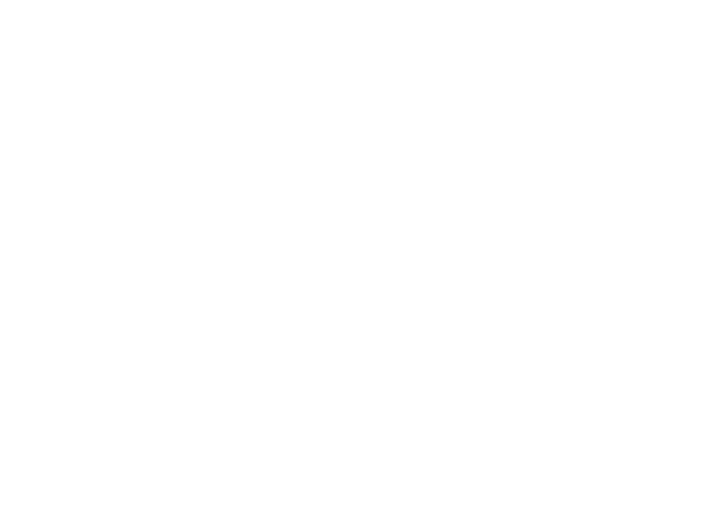

In [27]:
idx = stats.index('marketCap')
idx = 2

plt.figure()
# plt.hist([x[:,idx] for x in cstats], bins=20, stacked=True, label=countries);
plt.hist([np.log10(x[:,idx]) for x in cstats], bins=20, stacked=True, label=countries);
plt.legend()
# plt.xscale('log');

In [199]:
tk = yf.Ticker('MC.PA')
tk

yfinance.Ticker object <MC.PA>

In [206]:
print(tabulate(sorted(item.items())))

----------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
52WeekChange                  0.3236292

In [209]:
track = tk.history('max')
track.shape

(5659, 7)

In [212]:
track[:10]

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
2000-01-03  60.461935  61.384214  58.103536  58.498802   615855        0.0   
2000-01-04  59.816372  59.816372  52.965157  52.965157  1691700        0.0   
2000-01-05  52.042875  52.569893  50.066563  51.173298  1563735        0.0   
2000-01-06  51.120588  51.120588  49.052049  50.593575  1641215        0.0   
2000-01-07  50.330065  50.593575  48.762188  50.593575  1360530        0.0   
2000-01-10  51.120584  54.467139  51.107411  52.727985  2381515        0.0   
2000-01-11  53.755665  54.677944  52.965142  53.755665  1157955        0.0   
2000-01-12  53.571201  56.917755  53.360395  56.127228  1444595        0.0   
2000-01-13  56.390741  59.908578  55.995480  59.552841  1356875        0.0   
2000-01-14  60.079842  62.293310  57.866373  61.924400  1059010        0.0   

            Stock Splits  
Date                      
2000-01-03           0.0  
2000-01-04           0.0  
2000-01-05           0.0  
2000-01-06           0.0  
2000-01-07           0.0  
2000-01-10           0.0  
2000-01-11           0.0  
2000-01-12           0.0  
2000-01-13           0.0  
2000-01-14           0.0

<IPython.core.display.Javascript object>


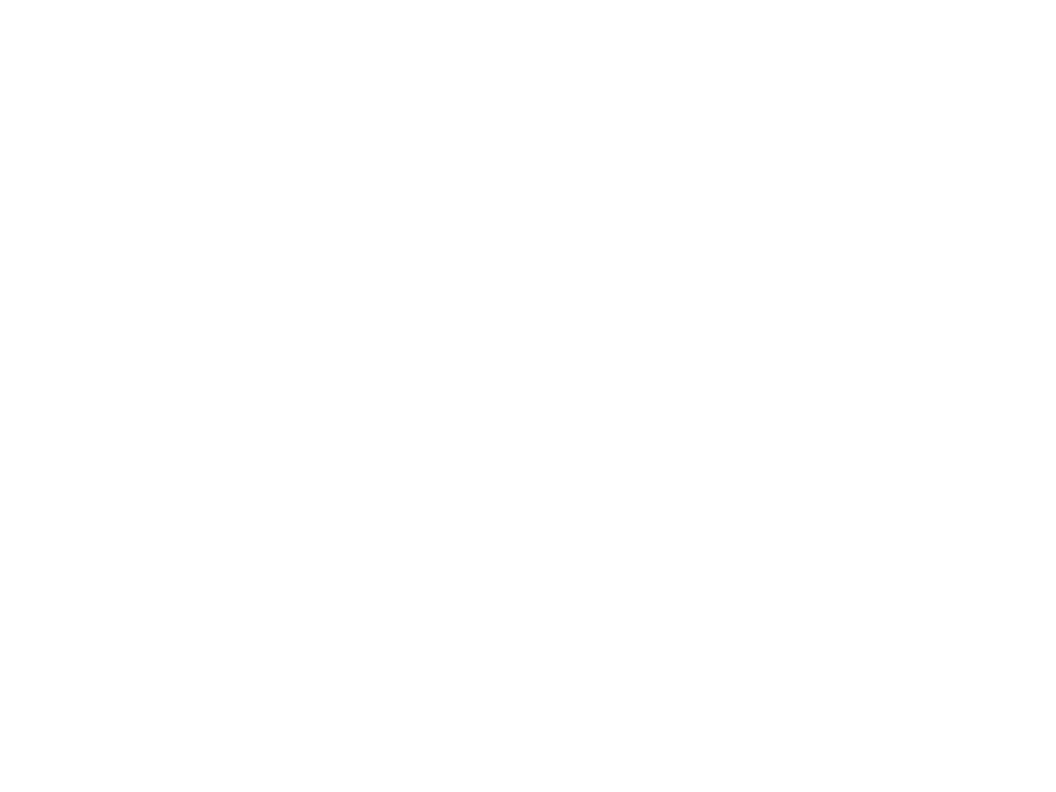

In [227]:
date_array  = track.index
price_array = track['Close']
plt.figure()
plt.plot(date_array, price_array, linestyle = 'solid');

In [211]:
dat = np.array(track)
dat.shape

(5659, 7)

<IPython.core.display.Javascript object>


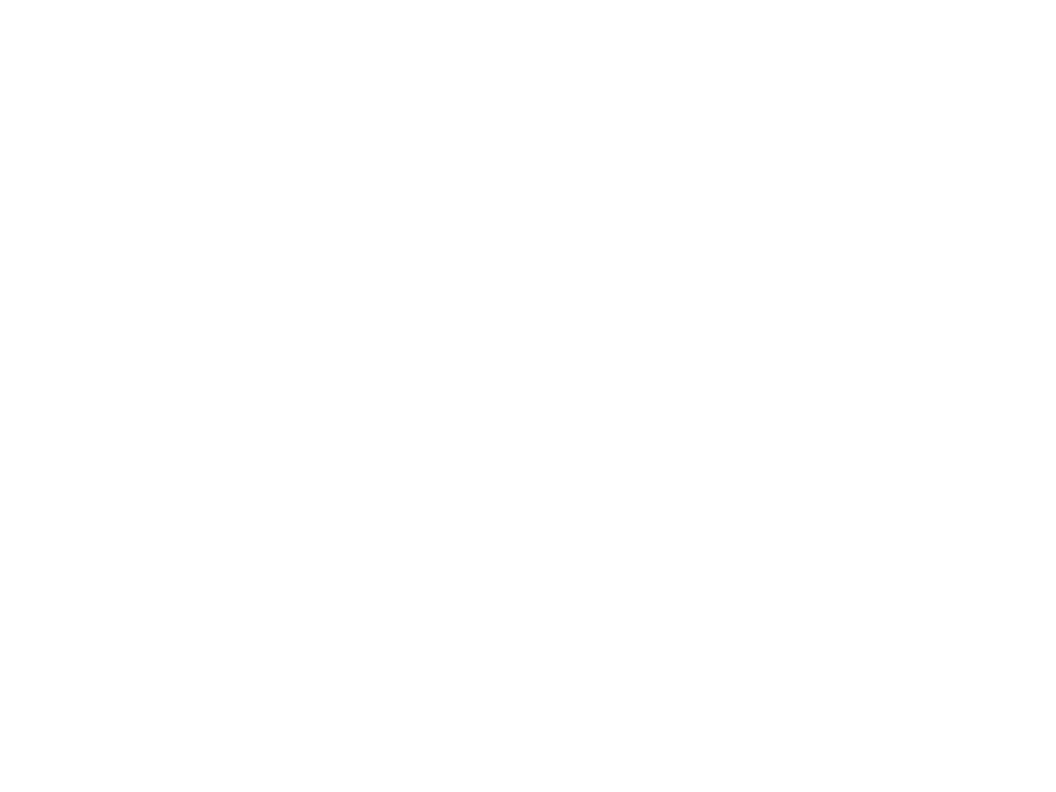

In [216]:
plt.figure()
plt.plot(dat[:,0])

In [237]:
tk = yf.Ticker('AAPL')
tk

yfinance.Ticker object <AAPL>

In [267]:
tk.history?

In [268]:
getattr(tk, 'info')

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [238]:
tk.info['companyOfficers']

[]

In [11]:
from src import yahoo

In [25]:
order = sorted(euro, key=lambda x: x['ratio'], reverse=True)
[o['ticker'] for o in order][:6]

['ABI.BR', 'EBS.VI', 'EDP.LS', 'ASML.AS', 'IBE.MC', 'EDPR.LS']

In [21]:

itr = tqdm(order, total=len(euro))
for info in itr:
    if info['ticker'] not in {'MT.PA', 'GLPG.BR', '00656.LS'}:
        itr.set_description(info['ticker'])
        yahoo.download(info['ticker'])

  0%|          | 0/327 [00:00<?, ?it/s]

- 00656.LS: No data found, symbol may be delisted
- 00656.LS: No data found, symbol may be delisted
- 00656.LS: No data found, symbol may be delisted


In [22]:
skip = {'MT.PA', 'GLPG.BR', '00656.LS'}

In [26]:
print([tk['ticker'] for tk in order if tk['ticker'] not in skip])

['ABI.BR', 'EBS.VI', 'EDP.LS', 'ASML.AS', 'IBE.MC', 'EDPR.LS', 'SAN.MC', 'ENEL.MI', 'OMV.VI', 'ISP.MI', 'MC.PA', 'BBVA.MC', 'KBC.BR', 'VER.VI', 'PRX.AS', 'STLA.MI', 'ENI.MI', 'SAP.DE', 'SIE.DE', 'INGA.AS', 'TTE.PA', 'ALV.DE', 'UCB.BR', 'SAN.PA', 'ARGX.BR', 'UCG.MI', 'OR.PA', 'GALP.LS', 'JMT.LS', 'ADYEN.AS', 'CABK.MC', 'TEF.MC', 'RENE.LS', 'NVG.LS', 'SON.LS', 'REP.MC', 'BAS.DE', 'AD.AS', 'G.MI', 'SU.PA', 'NOS.LS', 'BCP.LS', 'DAI.DE', 'ANDR.VI', 'BG.VI', 'CTT.LS', 'AMS.MC', 'GBLB.BR', 'AENA.MC', 'WIE.VI', 'VOE.VI', 'ALTR.LS', 'DSM.AS', 'SOLB.BR', 'DTE.DE', 'FER.MC', 'AI.PA', 'BNP.PA', 'RACE.MI', 'BAYN.DE', 'DPW.DE', 'COR.LS', 'RBI.VI', 'AIR.PA', 'ITX.MC', 'CNHI.MI', 'PHIA.AS', 'AGS.BR', 'WKL.AS', 'IFX.DE', 'CLNX.MC', 'IIA.VI', 'ADS.DE', 'HEIA.AS', 'MONC.MI', 'REE.MC', 'UMI.BR', 'SOF.BR', 'CS.PA', 'ELE.MC', 'WDP.BR', 'NTGY.MC', 'SRG.MI', 'DG.PA', 'MUV2.DE', 'TRN.MI', 'AKZA.AS', 'KER.PA', 'VNA.DE', 'LNZ.VI', 'ACS.MC', 'EL.PA', 'CAI.VI', 'TKA.VI', 'VOW3.DE', 'POST.VI', 'EXO.MI', 'FBK.MI', '

In [16]:
tk  = yf.Ticker('MT.PA')
tk

yfinance.Ticker object <MT.PA>